In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd 


%matplotlib notebook 



# Linear regression example


We first begin by opening the linear regression train dataset. You should print lr_data just to see how the dataframe looks like. Then we convert both the columns to arrays. 

Note: Remember to change the path the the file "Linear_Regression_train.csv" my file was in the folder "datasets_Regression" yours may not be. This will be the first error that you might get if you dont have the location in right place. 


In [2]:
# open linear regression train dataset in pandas

lr_data = pd.read_csv("datasets_Regression/Linear_Regression_train.csv")
x = np.array(lr_data["x"].tolist())
y_noised = np.array(lr_data["y"].tolist())


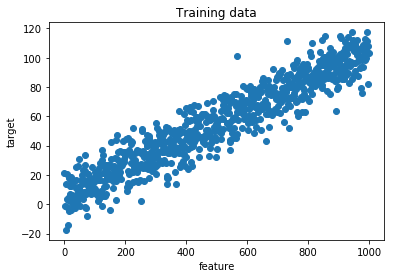

In [3]:
# plotting the training set data 

plt.figure()
plt.scatter(x ,y_noised)
plt.title("Training data")
plt.xlabel("feature")
plt.ylabel("target")
plt.show()


Next up, we need to reshape both the x values and y values to fit it to a linear regression model. Below is the code that you need to run to reshape it such that you can fit it to the linear regression model. 


In [4]:

x_shape = x.shape[0]
y_noised_shape = y_noised.shape[0]

print("x shape and y noised shape", x_shape, y_noised_shape) 

x_reshaped = x.reshape(x_shape, 1)
y_noised_reshaped = y_noised.reshape(x_shape, 1)


print("print shapes of reshaped array- {} {}".format(x_reshaped.shape, y_noised_reshaped.shape))

x shape and y noised shape 800 800
print shapes of reshaped array- (800, 1) (800, 1)


In [5]:
# ftting a linear regression model 
lr = LinearRegression()

lr.fit(x_reshaped, y_noised_reshaped)

pred_slope = lr.coef_
pred_b = lr.intercept_

print("slope and b values {} {}".format(pred_slope, pred_b))



slope and b values [[0.09939605]] [5.8285983]


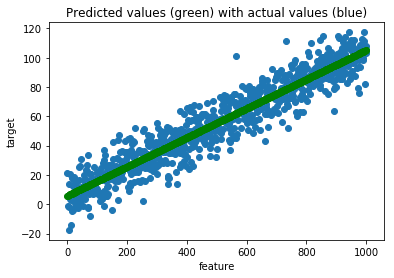

In [6]:
# predicting the values from the linear regression model 
predicted_values = lr.predict(x_reshaped)

# visualizing the predicted values and the actual y values 
plt.figure()
plt.scatter(x, y_noised)
plt.scatter(x, predicted_values, color="green")
plt.title("Predicted values (green) with actual values (blue)")
plt.xlabel("feature")
plt.ylabel("target")
plt.show()



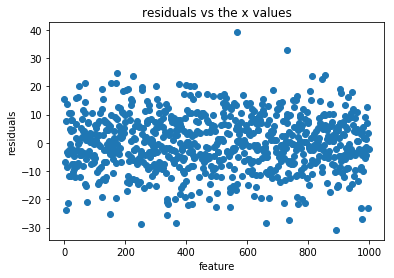

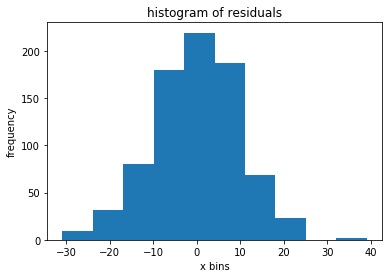

In [7]:
# calculating and plotting the residual 

predicted_values_reshaped = predicted_values.reshape(800,)
residuals =y_noised - predicted_values_reshaped

plt.figure()
plt.scatter(x, residuals)
plt.title("residuals vs the x values")
plt.xlabel("feature")
plt.ylabel("residuals")
plt.show()

# histogram of residualabss 
plt.figure()
plt.hist(residuals)
plt.title("histogram of residuals")
plt.xlabel("x bins")
plt.ylabel("frequency")
plt.show()



# Parabolic dataset


In [8]:
# open the dataset 

lr_data = pd.read_csv("datasets_Regression/Parabolic_train.csv")
x = np.array(lr_data["x"].tolist())
y_noised = np.array(lr_data["y"].tolist())



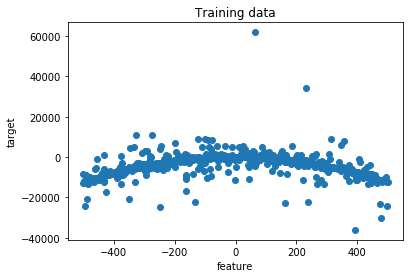

In [9]:
# plotting the training set data 

plt.figure()
plt.scatter(x ,y_noised)
plt.title("Training data")
plt.xlabel("feature")
plt.ylabel("target")
plt.show()


In [10]:
# reshaping the data for running linear regression

x_shape = x.shape[0]
y_noised_shape = y_noised.shape[0]

print("x shape and y noised shape", x_shape, y_noised_shape) 

x_reshaped = x.reshape(x_shape, 1)
y_noised_reshaped = y_noised.reshape(x_shape, 1)


print("print shapes of reshaped array- {} {}".format(x_reshaped.shape, y_noised_reshaped.shape))


x shape and y noised shape 800 800
print shapes of reshaped array- (800, 1) (800, 1)


## Fitting data with a line


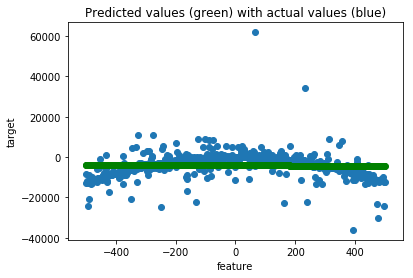

In [11]:
# running linear regression, getting out the predicted values and plotting them
lr = LinearRegression()

lr.fit(x_reshaped, y_noised_reshaped)

# predicting the values from the linear regression model 
predicted_values = lr.predict(x_reshaped)

# visualizing the predicted values and the actual y values 
plt.figure()
plt.scatter(x, y_noised)
plt.scatter(x, predicted_values, color="green")
plt.title("Predicted values (green) with actual values (blue)")
plt.xlabel("feature")
plt.ylabel("target")
plt.show()




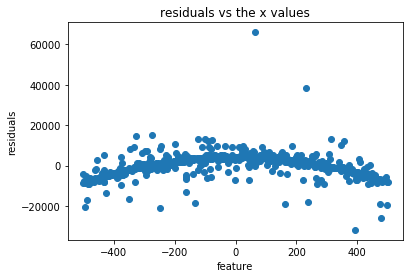

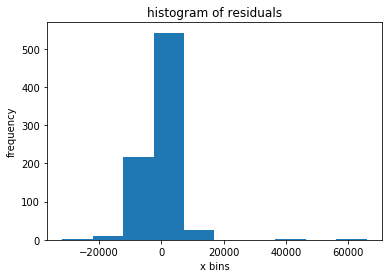

In [12]:
# calculating and plotting the residual 

predicted_values_reshaped = predicted_values.reshape(800,)
residuals =y_noised - predicted_values_reshaped

plt.figure()
plt.scatter(x, residuals)
plt.title("residuals vs the x values")
plt.xlabel("feature")
plt.ylabel("residuals")
plt.show()

# histogram of residualabss 
plt.figure()
plt.hist(residuals)
plt.title("histogram of residuals")
plt.xlabel("x bins")
plt.ylabel("frequency")
plt.show()


## Fitting with a polynomial

Fitting a polynomial is the same thing as doing linear regression with polynomial features. Each polynomial feature is just a power of the feature that we have.



In [13]:
# generating polynomial features

poly = PolynomialFeatures(2)
poly_features = poly.fit_transform(x_reshaped)

print("Shape of polynomial features{}".format(poly_features.shape))


Shape of polynomial features(800, 3)


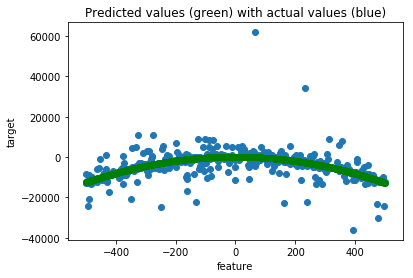

In [14]:
# performing linear regression with polynomial features

lr_poly = LinearRegression()
lr_poly.fit(poly_features, y_noised_reshaped)
predicted_values = lr_poly.predict(poly_features)


# visualizing the predicted values and the actual y values 

plt.figure()
plt.scatter(x, y_noised)
plt.scatter(x, predicted_values, color="green")
plt.title("Predicted values (green) with actual values (blue)")
plt.xlabel("feature")
plt.ylabel("target")
plt.show()



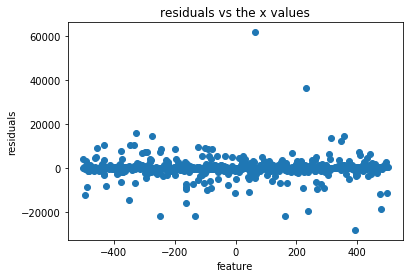

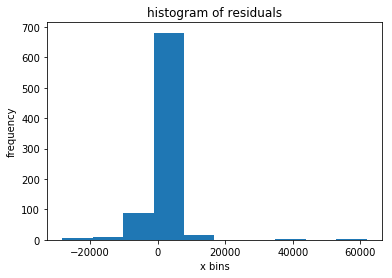

In [15]:
# calculating and plotting the residuals

predicted_values_reshaped = predicted_values.reshape(800,)
residuals =y_noised - predicted_values_reshaped

plt.figure()
plt.scatter(x, residuals)
plt.title("residuals vs the x values")
plt.xlabel("feature")
plt.ylabel("residuals")
plt.show()

# histogram of residualabss 
plt.figure()
plt.hist(residuals)
plt.title("histogram of residuals")
plt.xlabel("x bins")
plt.ylabel("frequency")
plt.show()
